<a href="https://colab.research.google.com/github/lisnanh/Kelompok10_NLP/blob/main/Analisis_Sentimen_Ulasan_Produk_Alexa_di_Amazon_Perbandingan_Akurasi_Naive_Bayes%2C_Logistic_Regression%2C_dan_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly as py
import cufflinks as cf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import nltk
import warnings
import re
import string
import time

# Additional Settings
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
warnings.filterwarnings('ignore')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [47]:
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
dataset_path = '/content/drive/My Drive/NLP/UAS NLP/Alexa Review.csv'
df = pd.read_csv(dataset_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
df.head()

,Index,Reviews
0,1,Alexa cannot hear after she starts playing
1,2,"I purchased this as a birthday gift for my 7 years old son. Since he don't have siblings so I though it would be a fun experience for him talking to and giving commands to alexa. But to my dismay he only used it for playing music that also only one song after one month of his birthday. ""Alexa please play the flying jat song"". There were things I demonstrated him about alexa like jungle quiz, panchtantra ki kahaniya, alexa laugh, beatbox, fart! Etc. But after one month of use he lost interest in it and being powered from socket I am also not interested to use it as a bluetooth speaker. I configured it to control a wipro smart bulb. But after few days I started using the smart bulb as a regular bulb because it's easier to press the physical switch compared to checking the configuration & connection everytime ""Alexa Bulb on"" or ""Alexa bulb off"" voice command doesn't work. So now it is kept idle since 3 months and will remain so for many more months/years to come. The bottomline is that alexa is not that useful as advertised and we tend to lose interest in it very quickly."
2,3,"/*Here I'm Uploading video, enjoy*/Most idiotic device I every bought, never play original songs. Always play some or the other remix or instrumental songs.I wish I would have bought Google home or some Bluetooth speakers./*Some attachments after talking to Amazon Echo Dot Executive*/After my above review, Echo Dot representative called me, I'm glad for this.I showed him the issue with song selection but he told me that it is because of library doesn't have songs that I'm selecting and it is better to add gaana.com from alexa app, after following his guidelines, I repeated and recorded issues. Please see the screen shots and listed to audio for Alexa and have fun (Now I realise amazon review doen't support audio but only video).You can buy this device if you have to have personalised fun in your life. The is not way of attaching Audio files only video so this is again funny, if I wan't to attach some feedback for Alexa why do I need Video :). This is called mismatch in basic requirement.I'll try to get capture view than attach here for same issues added as image. Till than enjoy."
3,4,Do not buy this product. When i asked alexa that kashmir is part of which country it said china.Boycott alexa
4,5,Its just one if the best deal i ever got on amazon I purchased it with a 12 watt wipro light at 2200 and enjoying it since last 2 daya its my 4th echo device and yes I would highly recommend buying a product with this just search echo dot wall mount you ll see a 800-900 rupees wall mount trust me it will make a huge difference between sound and transportability plus when its on wall if will recognise your voice quicker as it faces you on the wall seriously guys the combination of these two is compulsory


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4919 entries, 0 to 4918
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Index    4919 non-null   int64 
 1   Reviews  4918 non-null   object
dtypes: int64(1), object(1)
memory usage: 77.0+ KB


In [50]:
# Statistik deskriptif untuk kolom numerik
df['Reviews'].describe()

,Reviews
count,4918
unique,4440
top,Good
freq,109


**PRE-PROCESSING**

In [51]:
# To display complete reviews
pd. set_option('display.max_rows', None)
pd. set_option('display.max_columns', None)
pd. set_option('display.width', None)
pd. set_option('display.max_colwidth', None)

In [52]:
df.shape
df.reset_index(drop=True,inplace=True)

In [53]:
# Unduh stopwords dari NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Fungsi untuk membersihkan teks
def clean_text(text):
    if isinstance(text, str):  # Pastikan hanya string yang diproses
        # Menghapus semua karakter selain huruf
        text = re.sub(r'[^a-zA-Z]', ' ', text)
        # Mengubah semua teks menjadi huruf kecil
        text = text.lower()
        # Menghapus stopwords
        text = ' '.join([word for word in text.split() if word not in stop_words])
        return text
    else:
        return ''  # Kembalikan string kosong jika bukan tipe string

# 1. Menghapus baris duplikat
df = df.drop_duplicates()

# 2. Menghapus baris kosong pada seluruh kolom
df = df.dropna(how='any')

# 3. Membersihkan teks pada kolom reviews
df['cleaned_reviews'] = df['Reviews'].apply(clean_text)

# Menampilkan hasil
print("Dataset setelah pembersihan:")
print(df.info())
print(df[['Reviews', 'cleaned_reviews']].head())


Dataset setelah pembersihan:
<class 'pandas.core.frame.DataFrame'>
Index: 4918 entries, 0 to 4918
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Index            4918 non-null   int64 
 1   Reviews          4918 non-null   object
 2   cleaned_reviews  4918 non-null   object
dtypes: int64(1), object(2)
memory usage: 153.7+ KB
None
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
# Mengecek nilai null
print("Nilai Null per Kolom:")
print(df.isnull().sum())

# Mengecek data duplikat
print("\nJumlah Data Duplikat:", df.duplicated().sum())

Nilai Null per Kolom:
Index              0
Reviews            0
cleaned_reviews    0
dtype: int64

Jumlah Data Duplikat: 0


In [55]:
df.isnull().sum()

,0
Index,0
Reviews,0
cleaned_reviews,0


In [56]:
# Inisialisasi stemmer
stemmer = PorterStemmer()

# Fungsi untuk stemming
def stemming_text(text):
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

# Terapkan stemming pada kolom 'cleaned_reviews'
df['stemmed_reviews'] = df['cleaned_reviews'].apply(stemming_text)

# Menampilkan hasil
print(df[['cleaned_reviews', 'stemmed_reviews']].head())

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             cleaned_reviews  \
0                                                                                                                                                                                                                                                                                                       

**EDA**

In [57]:
#Calculating the Polarity scores using TextBlob
from textblob import TextBlob
df['polarity'] = (round(df['cleaned_reviews'].apply(lambda x: TextBlob(x).sentiment.polarity),4))

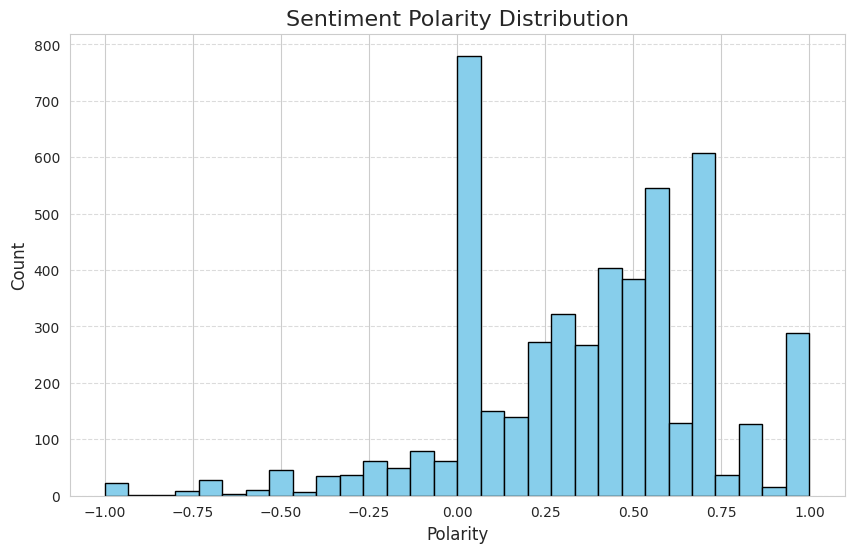

In [58]:
# Plot distribusi polaritas sentimen
plt.figure(figsize=(10, 6))
plt.hist(df['polarity'], bins=30, color='skyblue', edgecolor='black')
plt.title("Sentiment Polarity Distribution", fontsize=16)
plt.xlabel("Polarity", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [59]:
# Membuat kolom 'division' berdasarkan nilai polaritas
df['division'] = df['polarity'].apply(
    lambda i: 'negative' if i < 0 else 'positive' if i > 0 else 'neutral'
)

# Menampilkan beberapa baris untuk verifikasi
print(df[['polarity', 'division']].head())


   polarity  division
0    0.0000   neutral
1    0.2284  positive
2    0.1799  positive
3    0.0000   neutral
4    0.3158  positive


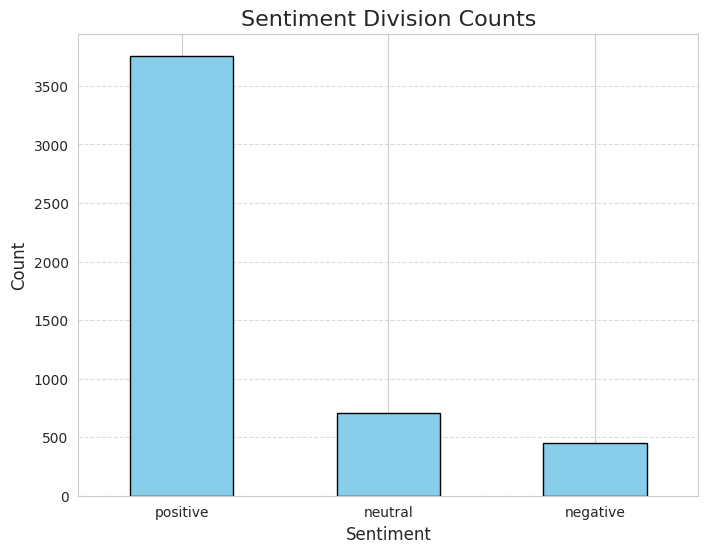

In [60]:
# Hitung jumlah masing-masing kategori di kolom 'division'
division_counts = df['division'].value_counts()

# Plot menggunakan Matplotlib
plt.figure(figsize=(8, 6))
division_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Sentiment Division Counts", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)  # Membuat label sumbu x horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [61]:
#Displaying 10 Highly polarized random reviews

print("10 Random Reviews with the Highest Polarity")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:10].index]['cleaned_reviews']):
    print('Review {}:\n'.format(index+1),review)

10 Random Reviews with the Highest Polarity
Review 1:
 awesome device needs improvement
Review 2:
 perfect item
Review 3:
 works perfectly
Review 4:
 best
Review 5:
 excellent
Review 6:
 superb
Review 7:
 nothing say awesome product
Review 8:
 best buy alexa best
Review 9:
 wonderful product
Review 10:
 excellent integration devices


In [62]:
#Displaying 10 Random Lowest polarized reviews

print("10 Random Reviews with the Lowest Polarity")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:10].index]['cleaned_reviews']):
    print('Review {}:\n'.format(index+1),review)

10 Random Reviews with the Lowest Polarity
Review 1:
 every time connect internet also plugged electricity board process worst
Review 2:
 worst connectivity alexa app established times connect
Review 3:
 one worst thing bought connection
Review 4:
 worst product received amazon worked well days stopped working requested return amazon denied seems seller sent repaired product amazon banned seller
Review 5:
 worst productunable install working
Review 6:
 terrible product
Review 7:
 nice valuable money recommend buy black colour
Review 8:
 worst experience speaker box
Review 9:
 needs lot development alexa horrible experience value money
Review 10:
 worst item buy amazon echo alexa consume lot internet gud make phone hang


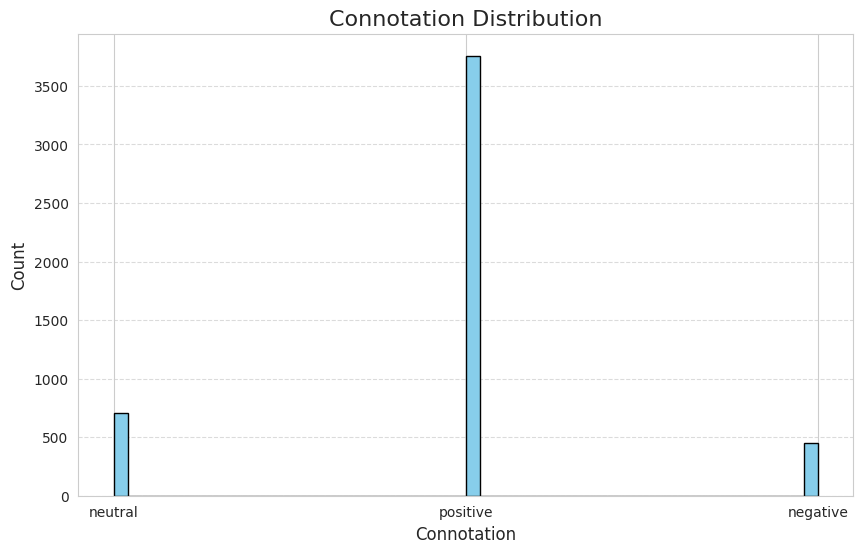

In [63]:
# Plot distribusi konotasi (division)
plt.figure(figsize=(10, 6))
plt.hist(df['division'], bins=50, color='skyblue', edgecolor='black', align='mid')
plt.title("Connotation Distribution", fontsize=16)
plt.xlabel("Connotation", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [64]:
#Storing the no.of chars in reviews in review_len column
df['review_len'] = df['cleaned_reviews'].apply(lambda x: len(x))
df.head()

,Index,Reviews,cleaned_reviews,stemmed_reviews,polarity,division,review_len
0,1,Alexa cannot hear after she starts playing,alexa cannot hear starts playing,alexa cannot hear start play,0.0000,neutral,32
1,2,"I purchased this as a birthday gift for my 7 years old son. Since he don't have siblings so I though it would be a fun experience for him talking to and giving commands to alexa. But to my dismay he only used it for playing music that also only one song after one month of his birthday. ""Alexa please play the flying jat song"". There were things I demonstrated him about alexa like jungle quiz, panchtantra ki kahaniya, alexa laugh, beatbox, fart! Etc. But after one month of use he lost interest in it and being powered from socket I am also not interested to use it as a bluetooth speaker. I configured it to control a wipro smart bulb. But after few days I started using the smart bulb as a regular bulb because it's easier to press the physical switch compared to checking the configuration & connection everytime ""Alexa Bulb on"" or ""Alexa bulb off"" voice command doesn't work. So now it is kept idle since 3 months and will remain so for many more months/years to come. The bottomline is that alexa is not that useful as advertised and we tend to lose interest in it very quickly.",purchased birthday gift years old son since siblings though would fun experience talking giving commands alexa dismay used playing music also one song one month birthday alexa please play flying jat song things demonstrated alexa like jungle quiz panchtantra ki kahaniya alexa laugh beatbox fart etc one month use lost interest powered socket also interested use bluetooth speaker configured control wipro smart bulb days started using smart bulb regular bulb easier press physical switch compared checking configuration connection everytime alexa bulb alexa bulb voice command work kept idle since months remain many months years come bottomline alexa useful advertised tend lose interest quickly,purchas birthday gift year old son sinc sibl though would fun experi talk give command alexa dismay use play music also one song one month birthday alexa pleas play fli jat song thing demonstr alexa like jungl quiz panchtantra ki kahaniya alexa laugh beatbox fart etc one month use lost interest power socket also interest use bluetooth speaker configur control wipro smart bulb day start use smart bulb regular bulb easier press physic switch compar check configur connect everytim alexa bulb alexa bulb voic command work kept idl sinc month remain mani month year come bottomlin alexa use advertis tend lose interest quickli,0.2284,positive,697
2,3,"/*Here I'm Uploading video, enjoy*/Most idiotic device I every bought, never play original songs. Always play some or the other remix or instrumental songs.I wish I would have bought Google home or some Bluetooth speakers./*Some attachments after talking to Amazon Echo Dot Executive*/After my above review, Echo Dot representative called me, I'm glad for this.I showed him the issue with song selection but he told me that it is because of library doesn't have songs that I'm selecting and it is better to add gaana.com from alexa app, after following his guidelines, I repeated and recorded issues. Please see the screen shots and listed to audio for Alexa and have fun (Now I realise amazon review doen't support audio but only video).You can buy this device if you have to have personalised fun in your life. The is not way of attaching Audio files only video so this is again funny, if I wan't to attach some feedback for Alexa why do I need Video :). This is called mismatch in basic requirement.I'll try to get capture view than attach here for same issues added as image. Till than enjoy.",uploading video enjoy idiotic device every bought never play original songs always play remix instrumental songs wish would bought google home bluetooth speakers attachments talking amazon echo dot executive review echo dot representative called glad 

In [65]:
#Storing the count of review tokens in word_count column
df['word_count'] = df['cleaned_reviews'].apply(lambda x: len(x.split()))
df.head()

,Index,Reviews,cleaned_reviews,stemmed_reviews,polarity,division,review_len,word_count
0,1,Alexa cannot hear after she starts playing,alexa cannot hear starts playing,alexa cannot hear start play,0.0000,neutral,32,5
1,2,"I purchased this as a birthday gift for my 7 years old son. Since he don't have siblings so I though it would be a fun experience for him talking to and giving commands to alexa. But to my dismay he only used it for playing music that also only one song after one month of his birthday. ""Alexa please play the flying jat song"". There were things I demonstrated him about alexa like jungle quiz, panchtantra ki kahaniya, alexa laugh, beatbox, fart! Etc. But after one month of use he lost interest in it and being powered from socket I am also not interested to use it as a bluetooth speaker. I configured it to control a wipro smart bulb. But after few days I started using the smart bulb as a regular bulb because it's easier to press the physical switch compared to checking the configuration & connection everytime ""Alexa Bulb on"" or ""Alexa bulb off"" voice command doesn't work. So now it is kept idle since 3 months and will remain so for many more months/years to come. The bottomline is that alexa is not that useful as advertised and we tend to lose interest in it very quickly.",purchased birthday gift years old son since siblings though would fun experience talking giving commands alexa dismay used playing music also one song one month birthday alexa please play flying jat song things demonstrated alexa like jungle quiz panchtantra ki kahaniya alexa laugh beatbox fart etc one month use lost interest powered socket also interested use bluetooth speaker configured control wipro smart bulb days started using smart bulb regular bulb easier press physical switch compared checking configuration connection everytime alexa bulb alexa bulb voice command work kept idle since months remain many months years come bottomline alexa useful advertised tend lose interest quickly,purchas birthday gift year old son sinc sibl though would fun experi talk give command alexa dismay use play music also one song one month birthday alexa pleas play fli jat song thing demonstr alexa like jungl quiz panchtantra ki kahaniya alexa laugh beatbox fart etc one month use lost interest power socket also interest use bluetooth speaker configur control wipro smart bulb day start use smart bulb regular bulb easier press physic switch compar check configur connect everytim alexa bulb alexa bulb voic command work kept idl sinc month remain mani month year come bottomlin alexa use advertis tend lose interest quickli,0.2284,positive,697,103
2,3,"/*Here I'm Uploading video, enjoy*/Most idiotic device I every bought, never play original songs. Always play some or the other remix or instrumental songs.I wish I would have bought Google home or some Bluetooth speakers./*Some attachments after talking to Amazon Echo Dot Executive*/After my above review, Echo Dot representative called me, I'm glad for this.I showed him the issue with song selection but he told me that it is because of library doesn't have songs that I'm selecting and it is better to add gaana.com from alexa app, after following his guidelines, I repeated and recorded issues. Please see the screen shots and listed to audio for Alexa and have fun (Now I realise amazon review doen't support audio but only video).You can buy this device if you have to have personalised fun in your life. The is not way of attaching Audio files only video so this is again funny, if I wan't to attach some feedback for Alexa why do I need Video :). This is called mismatch in basic requirement.I'll try to get capture view than attach here for same issues added as image. Till than enjoy.",uploading video enjoy idiotic device every bought never play original songs always play remix instrumental songs wish would bought google home bluetooth speakers attachments talking amazon echo dot executive review echo dot representa

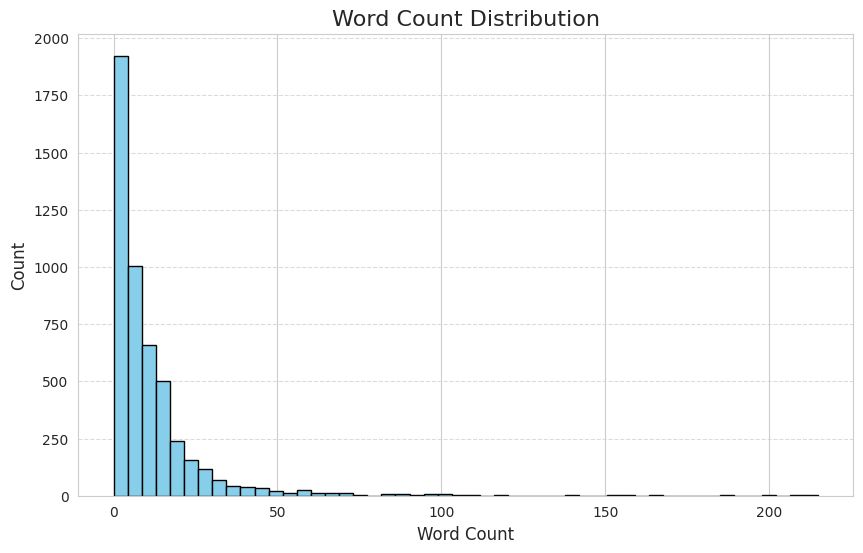

In [66]:
# Plot distribusi jumlah kata
plt.figure(figsize=(10, 6))
plt.hist(df['word_count'], bins=50, color='skyblue', edgecolor='black')
plt.title("Word Count Distribution", fontsize=16)
plt.xlabel("Word Count", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [67]:
#Storing the average length of reviews in avg_length column
df['avg_length'] = round(df['cleaned_reviews'].apply(lambda x: np.mean([len(w) for w in x.split()])),4)
df.head()

,Index,Reviews,cleaned_reviews,stemmed_reviews,polarity,division,review_len,word_count,avg_length
0,1,Alexa cannot hear after she starts playing,alexa cannot hear starts playing,alexa cannot hear start play,0.0000,neutral,32,5,5.6000
1,2,"I purchased this as a birthday gift for my 7 years old son. Since he don't have siblings so I though it would be a fun experience for him talking to and giving commands to alexa. But to my dismay he only used it for playing music that also only one song after one month of his birthday. ""Alexa please play the flying jat song"". There were things I demonstrated him about alexa like jungle quiz, panchtantra ki kahaniya, alexa laugh, beatbox, fart! Etc. But after one month of use he lost interest in it and being powered from socket I am also not interested to use it as a bluetooth speaker. I configured it to control a wipro smart bulb. But after few days I started using the smart bulb as a regular bulb because it's easier to press the physical switch compared to checking the configuration & connection everytime ""Alexa Bulb on"" or ""Alexa bulb off"" voice command doesn't work. So now it is kept idle since 3 months and will remain so for many more months/years to come. The bottomline is that alexa is not that useful as advertised and we tend to lose interest in it very quickly.",purchased birthday gift years old son since siblings though would fun experience talking giving commands alexa dismay used playing music also one song one month birthday alexa please play flying jat song things demonstrated alexa like jungle quiz panchtantra ki kahaniya alexa laugh beatbox fart etc one month use lost interest powered socket also interested use bluetooth speaker configured control wipro smart bulb days started using smart bulb regular bulb easier press physical switch compared checking configuration connection everytime alexa bulb alexa bulb voice command work kept idle since months remain many months years come bottomline alexa useful advertised tend lose interest quickly,purchas birthday gift year old son sinc sibl though would fun experi talk give command alexa dismay use play music also one song one month birthday alexa pleas play fli jat song thing demonstr alexa like jungl quiz panchtantra ki kahaniya alexa laugh beatbox fart etc one month use lost interest power socket also interest use bluetooth speaker configur control wipro smart bulb day start use smart bulb regular bulb easier press physic switch compar check configur connect everytim alexa bulb alexa bulb voic command work kept idl sinc month remain mani month year come bottomlin alexa use advertis tend lose interest quickli,0.2284,positive,697,103,5.7767
2,3,"/*Here I'm Uploading video, enjoy*/Most idiotic device I every bought, never play original songs. Always play some or the other remix or instrumental songs.I wish I would have bought Google home or some Bluetooth speakers./*Some attachments after talking to Amazon Echo Dot Executive*/After my above review, Echo Dot representative called me, I'm glad for this.I showed him the issue with song selection but he told me that it is because of library doesn't have songs that I'm selecting and it is better to add gaana.com from alexa app, after following his guidelines, I repeated and recorded issues. Please see the screen shots and listed to audio for Alexa and have fun (Now I realise amazon review doen't support audio but only video).You can buy this device if you have to have personalised fun in your life. The is not way of attaching Audio files only video so this is again funny, if I wan't to attach some feedback for Alexa why do I need Video :). This is called mismatch in basic requirement.I'll try to get capture view than attach here for same issues added as image. Till than enjoy.",uploading video enjoy idiotic device every bought never play original songs always play remix instrumental songs wish would bought google home bluetooth speakers attachments talking amazon echo dot executive r

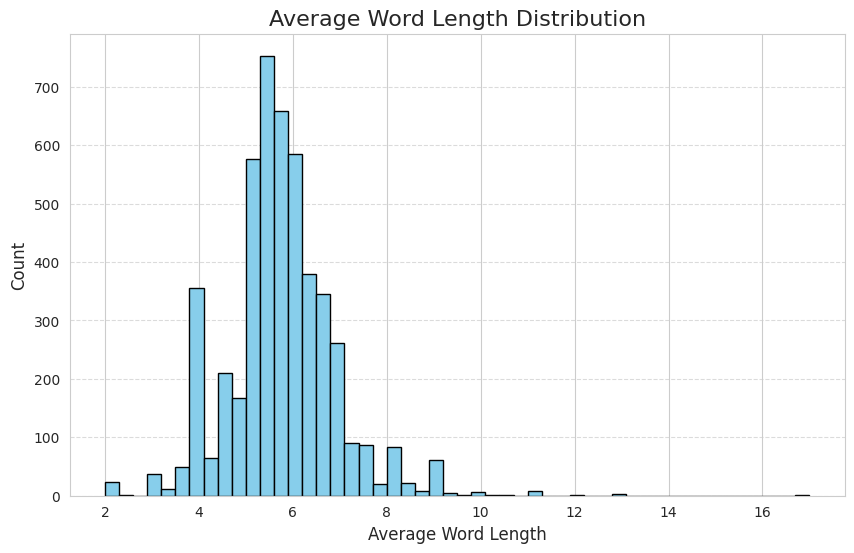

In [68]:
# Plot distribusi rata-rata panjang kata
plt.figure(figsize=(10, 6))
plt.hist(df['avg_length'], bins=50, color='skyblue', edgecolor='black')
plt.title("Average Word Length Distribution", fontsize=16)
plt.xlabel("Average Word Length", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [69]:
#Removing the extra spaces if there are any.
df['cleaned_reviews'] = df['cleaned_reviews'].apply(lambda x: re.sub(' +', ' ',x))
df.head()

,Index,Reviews,cleaned_reviews,stemmed_reviews,polarity,division,review_len,word_count,avg_length
0,1,Alexa cannot hear after she starts playing,alexa cannot hear starts playing,alexa cannot hear start play,0.0000,neutral,32,5,5.6000
1,2,"I purchased this as a birthday gift for my 7 years old son. Since he don't have siblings so I though it would be a fun experience for him talking to and giving commands to alexa. But to my dismay he only used it for playing music that also only one song after one month of his birthday. ""Alexa please play the flying jat song"". There were things I demonstrated him about alexa like jungle quiz, panchtantra ki kahaniya, alexa laugh, beatbox, fart! Etc. But after one month of use he lost interest in it and being powered from socket I am also not interested to use it as a bluetooth speaker. I configured it to control a wipro smart bulb. But after few days I started using the smart bulb as a regular bulb because it's easier to press the physical switch compared to checking the configuration & connection everytime ""Alexa Bulb on"" or ""Alexa bulb off"" voice command doesn't work. So now it is kept idle since 3 months and will remain so for many more months/years to come. The bottomline is that alexa is not that useful as advertised and we tend to lose interest in it very quickly.",purchased birthday gift years old son since siblings though would fun experience talking giving commands alexa dismay used playing music also one song one month birthday alexa please play flying jat song things demonstrated alexa like jungle quiz panchtantra ki kahaniya alexa laugh beatbox fart etc one month use lost interest powered socket also interested use bluetooth speaker configured control wipro smart bulb days started using smart bulb regular bulb easier press physical switch compared checking configuration connection everytime alexa bulb alexa bulb voice command work kept idle since months remain many months years come bottomline alexa useful advertised tend lose interest quickly,purchas birthday gift year old son sinc sibl though would fun experi talk give command alexa dismay use play music also one song one month birthday alexa pleas play fli jat song thing demonstr alexa like jungl quiz panchtantra ki kahaniya alexa laugh beatbox fart etc one month use lost interest power socket also interest use bluetooth speaker configur control wipro smart bulb day start use smart bulb regular bulb easier press physic switch compar check configur connect everytim alexa bulb alexa bulb voic command work kept idl sinc month remain mani month year come bottomlin alexa use advertis tend lose interest quickli,0.2284,positive,697,103,5.7767
2,3,"/*Here I'm Uploading video, enjoy*/Most idiotic device I every bought, never play original songs. Always play some or the other remix or instrumental songs.I wish I would have bought Google home or some Bluetooth speakers./*Some attachments after talking to Amazon Echo Dot Executive*/After my above review, Echo Dot representative called me, I'm glad for this.I showed him the issue with song selection but he told me that it is because of library doesn't have songs that I'm selecting and it is better to add gaana.com from alexa app, after following his guidelines, I repeated and recorded issues. Please see the screen shots and listed to audio for Alexa and have fun (Now I realise amazon review doen't support audio but only video).You can buy this device if you have to have personalised fun in your life. The is not way of attaching Audio files only video so this is again funny, if I wan't to attach some feedback for Alexa why do I need Video :). This is called mismatch in basic requirement.I'll try to get capture view than attach here for same issues added as image. Till than enjoy.",uploading video enjoy idiotic device every bought never play original songs always play remix instrumental songs wish would bought google home bluetooth speakers attachments talking amazon echo dot executive r

In [70]:
#creating list of stopwords as nltk stopwords contains Dont and Doesnt
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each',
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above',
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't",
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from',
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs',
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [71]:
#Removing Stopwords from reviews
df['cleaned_reviews'] = df['cleaned_reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df.head()

,Index,Reviews,cleaned_reviews,stemmed_reviews,polarity,division,review_len,word_count,avg_length
0,1,Alexa cannot hear after she starts playing,alexa cannot hear starts playing,alexa cannot hear start play,0.0000,neutral,32,5,5.6000
1,2,"I purchased this as a birthday gift for my 7 years old son. Since he don't have siblings so I though it would be a fun experience for him talking to and giving commands to alexa. But to my dismay he only used it for playing music that also only one song after one month of his birthday. ""Alexa please play the flying jat song"". There were things I demonstrated him about alexa like jungle quiz, panchtantra ki kahaniya, alexa laugh, beatbox, fart! Etc. But after one month of use he lost interest in it and being powered from socket I am also not interested to use it as a bluetooth speaker. I configured it to control a wipro smart bulb. But after few days I started using the smart bulb as a regular bulb because it's easier to press the physical switch compared to checking the configuration & connection everytime ""Alexa Bulb on"" or ""Alexa bulb off"" voice command doesn't work. So now it is kept idle since 3 months and will remain so for many more months/years to come. The bottomline is that alexa is not that useful as advertised and we tend to lose interest in it very quickly.",purchased birthday gift years old son since siblings though would fun experience talking giving commands alexa dismay used playing music also one song one month birthday alexa please play flying jat song things demonstrated alexa like jungle quiz panchtantra ki kahaniya alexa laugh beatbox fart etc one month use lost interest powered socket also interested use bluetooth speaker configured control wipro smart bulb days started using smart bulb regular bulb easier press physical switch compared checking configuration connection everytime alexa bulb alexa bulb voice command work kept idle since months remain many months years come bottomline alexa useful advertised tend lose interest quickly,purchas birthday gift year old son sinc sibl though would fun experi talk give command alexa dismay use play music also one song one month birthday alexa pleas play fli jat song thing demonstr alexa like jungl quiz panchtantra ki kahaniya alexa laugh beatbox fart etc one month use lost interest power socket also interest use bluetooth speaker configur control wipro smart bulb day start use smart bulb regular bulb easier press physic switch compar check configur connect everytim alexa bulb alexa bulb voic command work kept idl sinc month remain mani month year come bottomlin alexa use advertis tend lose interest quickli,0.2284,positive,697,103,5.7767
2,3,"/*Here I'm Uploading video, enjoy*/Most idiotic device I every bought, never play original songs. Always play some or the other remix or instrumental songs.I wish I would have bought Google home or some Bluetooth speakers./*Some attachments after talking to Amazon Echo Dot Executive*/After my above review, Echo Dot representative called me, I'm glad for this.I showed him the issue with song selection but he told me that it is because of library doesn't have songs that I'm selecting and it is better to add gaana.com from alexa app, after following his guidelines, I repeated and recorded issues. Please see the screen shots and listed to audio for Alexa and have fun (Now I realise amazon review doen't support audio but only video).You can buy this device if you have to have personalised fun in your life. The is not way of attaching Audio files only video so this is again funny, if I wan't to attach some feedback for Alexa why do I need Video :). This is called mismatch in basic requirement.I'll try to get capture view than attach here for same issues added as image. Till than enjoy.",uploading video enjoy idiotic device every bought never play original songs always play remix instrumental songs wish would bought google home bluetooth speakers attachments talking amazon echo dot executive r

In [72]:
nltk.data.path.append('/usr/local/share/nltk_data')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

**Tokenization and Lemmatization**

In [73]:
lemmatizer = WordNetLemmatizer()

# Menggunakan RegexpTokenizer untuk tokenisasi
tokenizer = RegexpTokenizer(r'\w+')

# Lemmatize String
def lemmatize_word(text):
    word_tokens = tokenizer.tokenize(text)  # Menggunakan RegexpTokenizer
    # Providing context i.e. The part of speech
    lemmas = [lemmatizer.lemmatize(word, pos='v') for word in word_tokens]
    return lemmas

df.cleaned_reviews = df.cleaned_reviews.apply(lemmatize_word)

df.head()


,Index,Reviews,cleaned_reviews,stemmed_reviews,polarity,division,review_len,word_count,avg_length
0,1,Alexa cannot hear after she starts playing,"[alexa, cannot, hear, start, play]",alexa cannot hear start play,0.0000,neutral,32,5,5.6000
1,2,"I purchased this as a birthday gift for my 7 years old son. Since he don't have siblings so I though it would be a fun experience for him talking to and giving commands to alexa. But to my dismay he only used it for playing music that also only one song after one month of his birthday. ""Alexa please play the flying jat song"". There were things I demonstrated him about alexa like jungle quiz, panchtantra ki kahaniya, alexa laugh, beatbox, fart! Etc. But after one month of use he lost interest in it and being powered from socket I am also not interested to use it as a bluetooth speaker. I configured it to control a wipro smart bulb. But after few days I started using the smart bulb as a regular bulb because it's easier to press the physical switch compared to checking the configuration & connection everytime ""Alexa Bulb on"" or ""Alexa bulb off"" voice command doesn't work. So now it is kept idle since 3 months and will remain so for many more months/years to come. The bottomline is that alexa is not that useful as advertised and we tend to lose interest in it very quickly.","[purchase, birthday, gift, years, old, son, since, siblings, though, would, fun, experience, talk, give, command, alexa, dismay, use, play, music, also, one, song, one, month, birthday, alexa, please, play, fly, jat, song, things, demonstrate, alexa, like, jungle, quiz, panchtantra, ki, kahaniya, alexa, laugh, beatbox, fart, etc, one, month, use, lose, interest, power, socket, also, interest, use, bluetooth, speaker, configure, control, wipro, smart, bulb, days, start, use, smart, bulb, regular, bulb, easier, press, physical, switch, compare, check, configuration, connection, everytime, alexa, bulb, alexa, bulb, voice, command, work, keep, idle, since, months, remain, many, months, years, come, bottomline, alexa, useful, advertise, tend, ...]",purchas birthday gift year old son sinc sibl though would fun experi talk give command alexa dismay use play music also one song one month birthday alexa pleas play fli jat song thing demonstr alexa like jungl quiz panchtantra ki kahaniya alexa laugh beatbox fart etc one month use lost interest power socket also interest use bluetooth speaker configur control wipro smart bulb day start use smart bulb regular bulb easier press physic switch compar check configur connect everytim alexa bulb alexa bulb voic command work kept idl sinc month remain mani month year come bottomlin alexa use advertis tend lose interest quickli,0.2284,positive,697,103,5.7767
2,3,"/*Here I'm Uploading video, enjoy*/Most idiotic device I every bought, never play original songs. Always play some or the other remix or instrumental songs.I wish I would have bought Google home or some Bluetooth speakers./*Some attachments after talking to Amazon Echo Dot Executive*/After my above review, Echo Dot representative called me, I'm glad for this.I showed him the issue with song selection but he told me that it is because of library doesn't have songs that I'm selecting and it is better to add gaana.com from alexa app, after following his guidelines, I repeated and recorded issues. Please see the screen shots and listed to audio for Alexa and have fun (Now I realise amazon review doen't support audio but only video).You can buy this device if you have to have personalised fun in your life. The is not way of attaching Audio files only video so this is again funny, if I wan't to attach some feedback for Alexa why do I need Video :). This is called mismatch in basic requirement.I'll try to get capture view than attach here for same issues added as image. Till than enjoy.","[upload, video, enjoy, idiotic, device, every, buy, never, play, original, songs, always, play, remix, instrumental, songs, wish, would, buy, googl

In [74]:
df.cleaned = df.cleaned_reviews.apply(lambda x: ' '.join(x))
df.head()

,Index,Reviews,cleaned_reviews,stemmed_reviews,polarity,division,review_len,word_count,avg_length
0,1,Alexa cannot hear after she starts playing,"[alexa, cannot, hear, start, play]",alexa cannot hear start play,0.0000,neutral,32,5,5.6000
1,2,"I purchased this as a birthday gift for my 7 years old son. Since he don't have siblings so I though it would be a fun experience for him talking to and giving commands to alexa. But to my dismay he only used it for playing music that also only one song after one month of his birthday. ""Alexa please play the flying jat song"". There were things I demonstrated him about alexa like jungle quiz, panchtantra ki kahaniya, alexa laugh, beatbox, fart! Etc. But after one month of use he lost interest in it and being powered from socket I am also not interested to use it as a bluetooth speaker. I configured it to control a wipro smart bulb. But after few days I started using the smart bulb as a regular bulb because it's easier to press the physical switch compared to checking the configuration & connection everytime ""Alexa Bulb on"" or ""Alexa bulb off"" voice command doesn't work. So now it is kept idle since 3 months and will remain so for many more months/years to come. The bottomline is that alexa is not that useful as advertised and we tend to lose interest in it very quickly.","[purchase, birthday, gift, years, old, son, since, siblings, though, would, fun, experience, talk, give, command, alexa, dismay, use, play, music, also, one, song, one, month, birthday, alexa, please, play, fly, jat, song, things, demonstrate, alexa, like, jungle, quiz, panchtantra, ki, kahaniya, alexa, laugh, beatbox, fart, etc, one, month, use, lose, interest, power, socket, also, interest, use, bluetooth, speaker, configure, control, wipro, smart, bulb, days, start, use, smart, bulb, regular, bulb, easier, press, physical, switch, compare, check, configuration, connection, everytime, alexa, bulb, alexa, bulb, voice, command, work, keep, idle, since, months, remain, many, months, years, come, bottomline, alexa, useful, advertise, tend, ...]",purchas birthday gift year old son sinc sibl though would fun experi talk give command alexa dismay use play music also one song one month birthday alexa pleas play fli jat song thing demonstr alexa like jungl quiz panchtantra ki kahaniya alexa laugh beatbox fart etc one month use lost interest power socket also interest use bluetooth speaker configur control wipro smart bulb day start use smart bulb regular bulb easier press physic switch compar check configur connect everytim alexa bulb alexa bulb voic command work kept idl sinc month remain mani month year come bottomlin alexa use advertis tend lose interest quickli,0.2284,positive,697,103,5.7767
2,3,"/*Here I'm Uploading video, enjoy*/Most idiotic device I every bought, never play original songs. Always play some or the other remix or instrumental songs.I wish I would have bought Google home or some Bluetooth speakers./*Some attachments after talking to Amazon Echo Dot Executive*/After my above review, Echo Dot representative called me, I'm glad for this.I showed him the issue with song selection but he told me that it is because of library doesn't have songs that I'm selecting and it is better to add gaana.com from alexa app, after following his guidelines, I repeated and recorded issues. Please see the screen shots and listed to audio for Alexa and have fun (Now I realise amazon review doen't support audio but only video).You can buy this device if you have to have personalised fun in your life. The is not way of attaching Audio files only video so this is again funny, if I wan't to attach some feedback for Alexa why do I need Video :). This is called mismatch in basic requirement.I'll try to get capture view than attach here for same issues added as image. Till than enjoy.","[upload, video, enjoy, idiotic, device, every, buy, never, play, original, songs, always, play, remix, instrumental, songs, wish, would, buy, googl

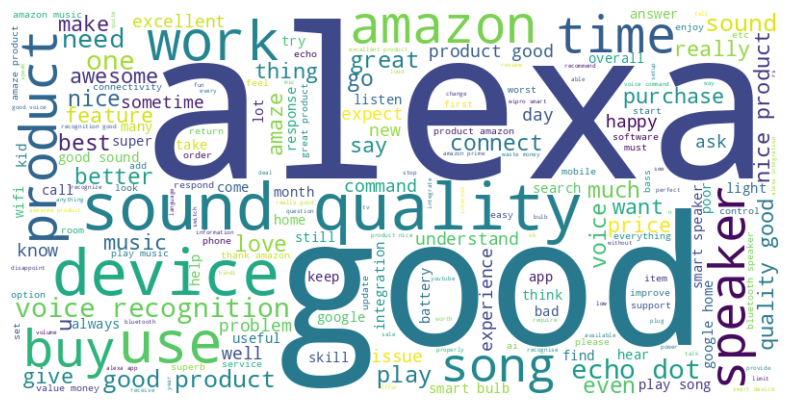

In [75]:
# Gabungkan lemmas dalam setiap baris menjadi satu string
df['cleaned_reviews'] = df['cleaned_reviews'].apply(lambda x: ' '.join(x))

# Gabungkan semua teks menjadi satu string besar
text = ' '.join(df['cleaned_reviews'])

# Visualisasi WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Matikan axis
plt.show()


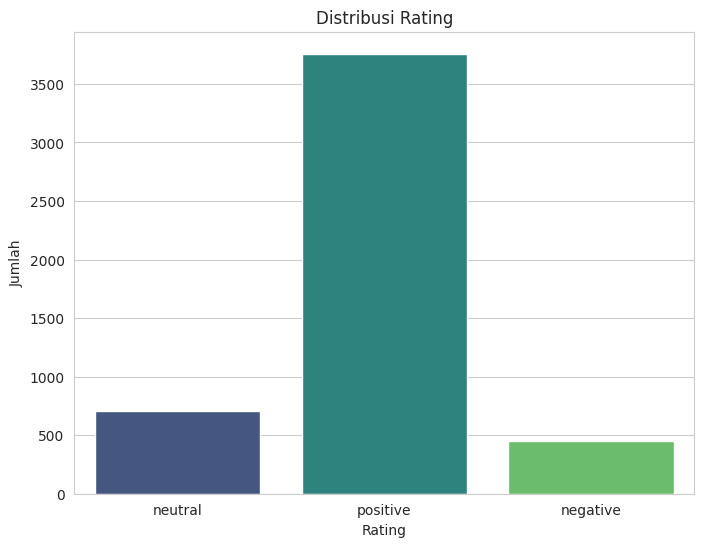

In [76]:
# Grafik batang distribusi rating
plt.figure(figsize=(8, 6))
sns.countplot(x='division', data=df, palette='viridis')
plt.title('Distribusi Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

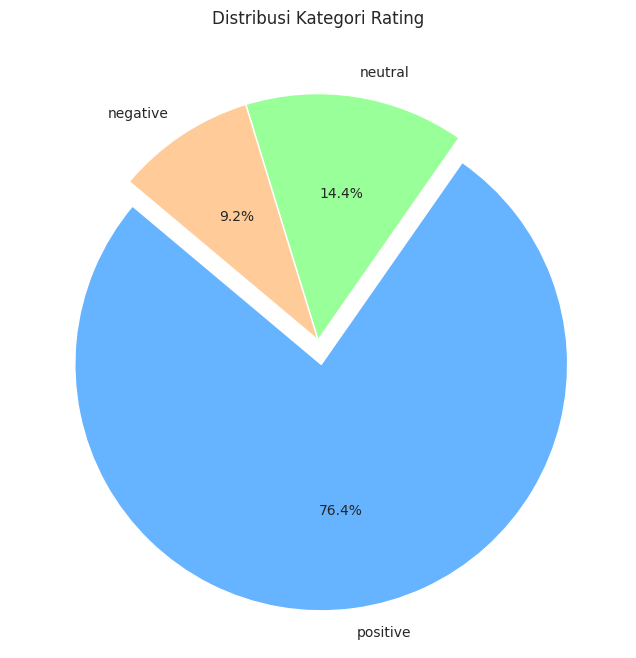

In [77]:
# Pie chart distribusi kategori rating
rating_category_counts = df['division'].value_counts()

plt.figure(figsize=(8, 8))
rating_category_counts.plot.pie(
    autopct='%1.1f%%',
    colors=['#66b3ff', '#99ff99', '#ffcc99'],
    startangle=140,
    explode=(0.1, 0, 0)  # Memperjelas bagian kategori tertentu
)
plt.title('Distribusi Kategori Rating')
plt.ylabel('')  # Menghilangkan label default
plt.show()

In [78]:
# Menyimpan data yang sudah bersih
df.to_csv('/content/drive/MyDrive/NLP/UAS NLP/cleaned_reviews.csv', index=False)

**DATA YANG SUDAH DIBERSIHKAN**

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4918 entries, 0 to 4918
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            4918 non-null   int64  
 1   Reviews          4918 non-null   object 
 2   cleaned_reviews  4918 non-null   object 
 3   stemmed_reviews  4918 non-null   object 
 4   polarity         4918 non-null   float64
 5   division         4918 non-null   object 
 6   review_len       4918 non-null   int64  
 7   word_count       4918 non-null   int64  
 8   avg_length       4874 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 384.2+ KB


In [80]:
df.head(10)

,Index,Reviews,cleaned_reviews,stemmed_reviews,polarity,division,review_len,word_count,avg_length
0,1,Alexa cannot hear after she starts playing,alexa cannot hear start play,alexa cannot hear start play,0.0000,neutral,32,5,5.6000
1,2,"I purchased this as a birthday gift for my 7 years old son. Since he don't have siblings so I though it would be a fun experience for him talking to and giving commands to alexa. But to my dismay he only used it for playing music that also only one song after one month of his birthday. ""Alexa please play the flying jat song"". There were things I demonstrated him about alexa like jungle quiz, panchtantra ki kahaniya, alexa laugh, beatbox, fart! Etc. But after one month of use he lost interest in it and being powered from socket I am also not interested to use it as a bluetooth speaker. I configured it to control a wipro smart bulb. But after few days I started using the smart bulb as a regular bulb because it's easier to press the physical switch compared to checking the configuration & connection everytime ""Alexa Bulb on"" or ""Alexa bulb off"" voice command doesn't work. So now it is kept idle since 3 months and will remain so for many more months/years to come. The bottomline is that alexa is not that useful as advertised and we tend to lose interest in it very quickly.",purchase birthday gift years old son since siblings though would fun experience talk give command alexa dismay use play music also one song one month birthday alexa please play fly jat song things demonstrate alexa like jungle quiz panchtantra ki kahaniya alexa laugh beatbox fart etc one month use lose interest power socket also interest use bluetooth speaker configure control wipro smart bulb days start use smart bulb regular bulb easier press physical switch compare check configuration connection everytime alexa bulb alexa bulb voice command work keep idle since months remain many months years come bottomline alexa useful advertise tend lose interest quickly,purchas birthday gift year old son sinc sibl though would fun experi talk give command alexa dismay use play music also one song one month birthday alexa pleas play fli jat song thing demonstr alexa like jungl quiz panchtantra ki kahaniya alexa laugh beatbox fart etc one month use lost interest power socket also interest use bluetooth speaker configur control wipro smart bulb day start use smart bulb regular bulb easier press physic switch compar check configur connect everytim alexa bulb alexa bulb voic command work kept idl sinc month remain mani month year come bottomlin alexa use advertis tend lose interest quickli,0.2284,positive,697,103,5.7767
2,3,"/*Here I'm Uploading video, enjoy*/Most idiotic device I every bought, never play original songs. Always play some or the other remix or instrumental songs.I wish I would have bought Google home or some Bluetooth speakers./*Some attachments after talking to Amazon Echo Dot Executive*/After my above review, Echo Dot representative called me, I'm glad for this.I showed him the issue with song selection but he told me that it is because of library doesn't have songs that I'm selecting and it is better to add gaana.com from alexa app, after following his guidelines, I repeated and recorded issues. Please see the screen shots and listed to audio for Alexa and have fun (Now I realise amazon review doen't support audio but only video).You can buy this device if you have to have personalised fun in your life. The is not way of attaching Audio files only video so this is again funny, if I wan't to attach some feedback for Alexa why do I need Video :). This is called mismatch in basic requirement.I'll try to get capture view than attach here for same issues added as image. Till than enjoy.",upload video enjoy idiotic device every buy never play original songs always play remix instrumental songs wish would buy google home bluetooth speakers attachments talk amazon echo dot executive review echo dot representative call glad show 

**Algoritma dan Ektraksi Fitur**

In [81]:
# Menggunakan seluruh data dari dataset
X = df['cleaned_reviews']
y = df['division']

# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vektorisasi
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=10000)  # Batasi fitur
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

**Logistic Regression**

convergence after 23 epochs took 0 seconds
Logistic Regression
Accuracy: 0.8516260162601627
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.41      0.59        82
     neutral       0.75      0.36      0.48       143
    positive       0.85      0.99      0.92       759

    accuracy                           0.85       984
   macro avg       0.87      0.59      0.66       984
weighted avg       0.85      0.85      0.83       984



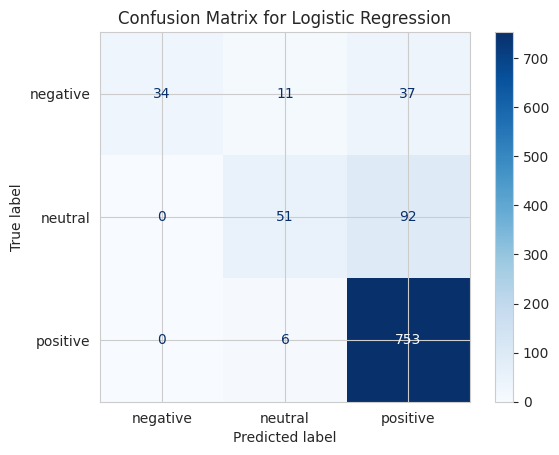

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=10000, solver='saga', verbose=1)
lr_model.fit(X_train_vec, y_train)
y_pred_lr = lr_model.predict(X_test_vec)

# Evaluasi Logistic Regression
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


**Naive Bayes**

Naive Bayes
Accuracy: 0.7754065040650406
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.05      0.09        82
     neutral       0.00      0.00      0.00       143
    positive       0.77      1.00      0.87       759

    accuracy                           0.78       984
   macro avg       0.59      0.35      0.32       984
weighted avg       0.68      0.78      0.68       984



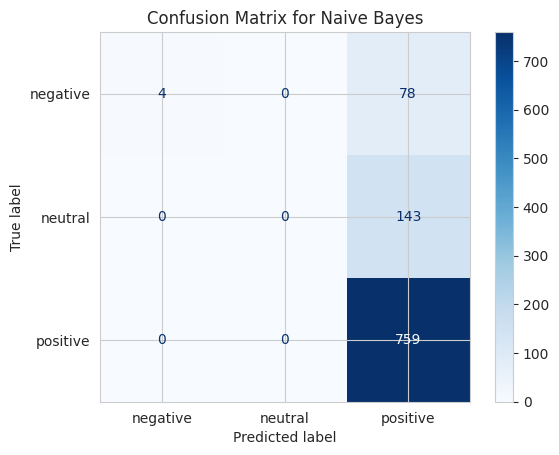

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
y_pred_nb = nb_model.predict(X_test_vec)

# Evaluasi Naive Bayes
print("Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Naive Bayes")
plt.show()


**Random Forest**

Random Forest Classifier
Accuracy: 0.8943089430894309
Classification Report:
               precision    recall  f1-score   support

    negative       0.98      0.52      0.68        82
     neutral       0.74      0.72      0.73       143
    positive       0.92      0.97      0.94       759

    accuracy                           0.89       984
   macro avg       0.88      0.74      0.78       984
weighted avg       0.90      0.89      0.89       984



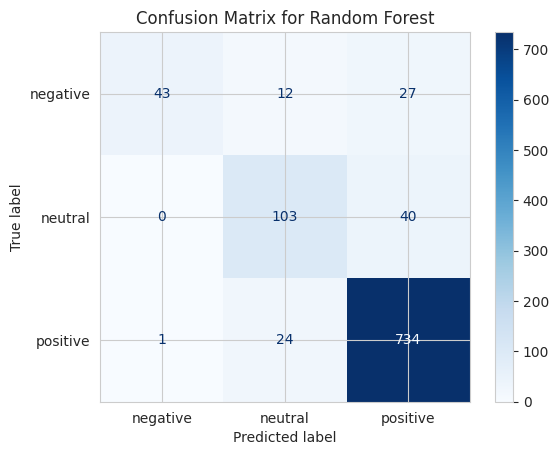

In [84]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=100,  # Gunakan jumlah estimator yang lebih masuk akal
    random_state=42,
    n_jobs=-1  # Gunakan semua core CPU
)
rf_model.fit(X_train_vec, y_train)
y_pred_rf = rf_model.predict(X_test_vec)

# Evaluasi Random Forest
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap="Blues")
plt.title("Confusion Matrix for Random Forest")
plt.show()


**Perbandingan Algoritma**

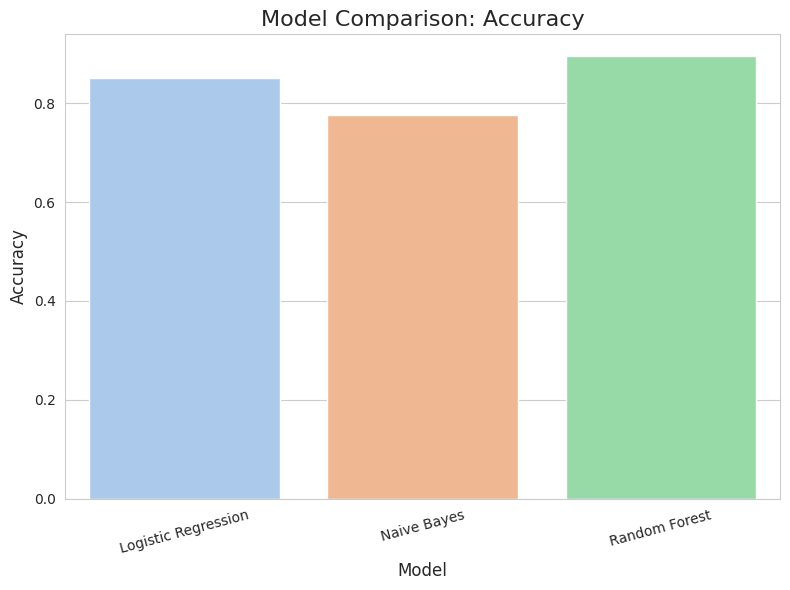

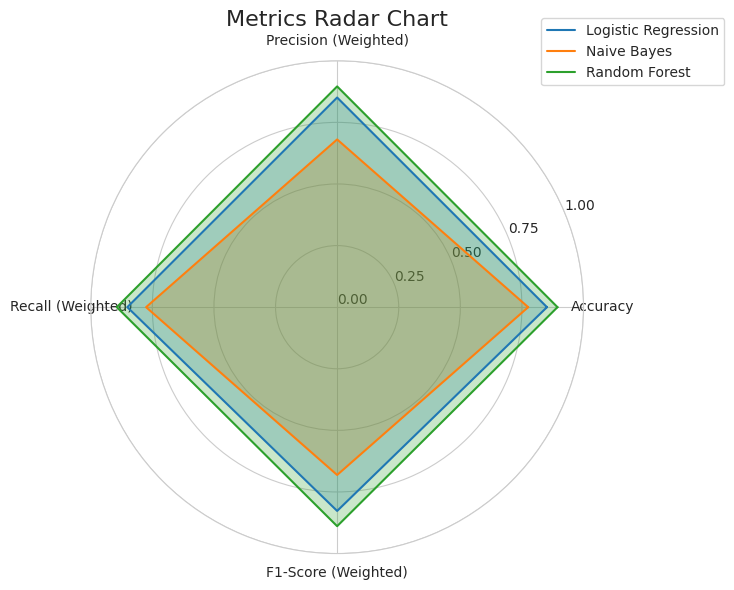

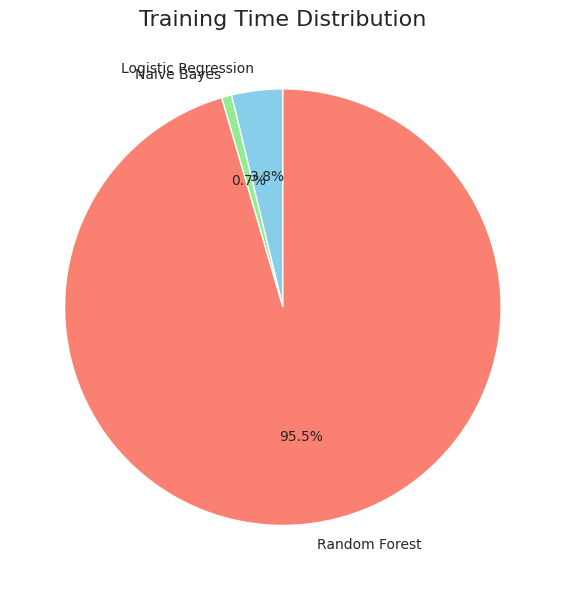

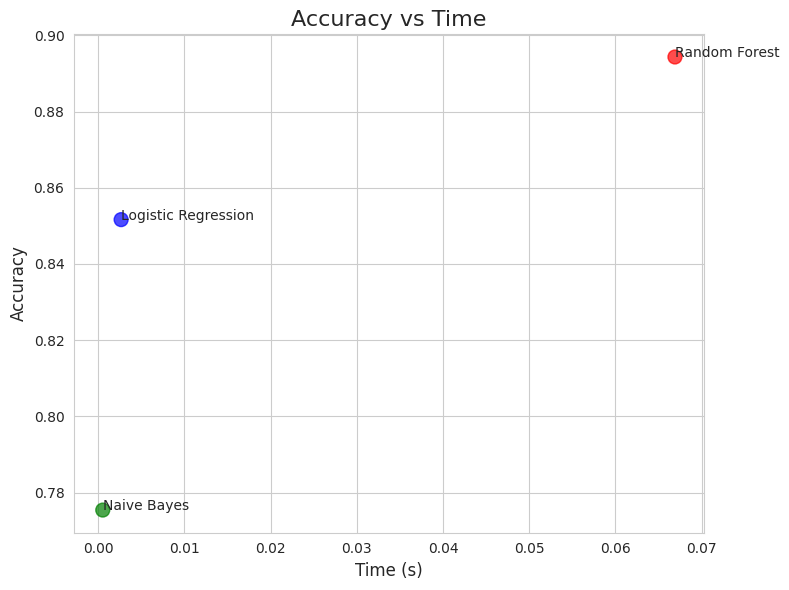

In [85]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Evaluasi model dan hitung waktu
def evaluate_model(model, X_test_vec, y_test):
    start_time = time.time()
    y_pred = model.predict(X_test_vec)
    elapsed_time = time.time() - start_time
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (Weighted)": precision_score(y_test, y_pred, average='weighted'),
        "Recall (Weighted)": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score (Weighted)": f1_score(y_test, y_pred, average='weighted'),
        "Time (s)": elapsed_time
    }

# Evaluasi semua model
results = {
    "Model": ["Logistic Regression", "Naive Bayes", "Random Forest"],
    "Accuracy": [],
    "Precision (Weighted)": [],
    "Recall (Weighted)": [],
    "F1-Score (Weighted)": [],
    "Time (s)": []
}

# Tambahkan evaluasi untuk masing-masing model
for model, y_pred in zip(
    [lr_model, nb_model, rf_model],
    [y_pred_lr, y_pred_nb, y_pred_rf]
):
    eval_metrics = evaluate_model(model, X_test_vec, y_test)
    results["Accuracy"].append(eval_metrics["Accuracy"])
    results["Precision (Weighted)"].append(eval_metrics["Precision (Weighted)"])
    results["Recall (Weighted)"].append(eval_metrics["Recall (Weighted)"])
    results["F1-Score (Weighted)"].append(eval_metrics["F1-Score (Weighted)"])
    results["Time (s)"].append(eval_metrics["Time (s)"])

# Buat DataFrame dari hasil evaluasi
results_df = pd.DataFrame(results)

# Panggil visualisasi
plot_comparison(results_df, y_test, y_pred_rf, y_pred_nb, y_pred_lr)


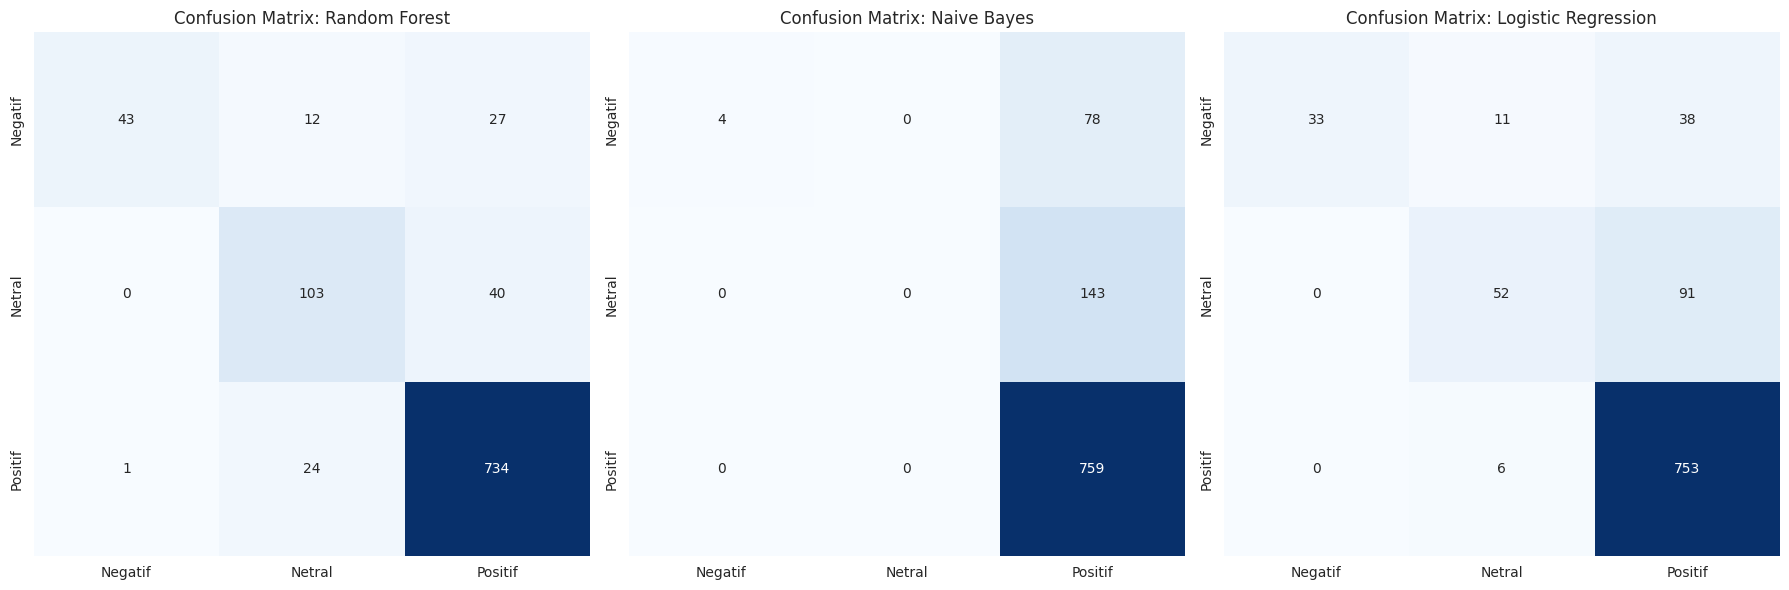

                     Accuracy  Precision    Recall  F1-Score
Random Forest        0.894309   0.895949  0.894309  0.888890
Naive Bayes          0.775407   0.680729  0.775407  0.681068
Logistic Regression  0.851626   0.851380  0.851626  0.827003


In [86]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Misalkan model lainnya yang akan dibandingkan adalah Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_vec, y_train)
y_pred_lr = lr_model.predict(X_test_vec)

# Misalkan model lainnya yang akan dibandingkan adalah Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
y_pred_nb = nb_model.predict(X_test_vec)

# Misalkan model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_vec, y_train)
y_pred_rf = rf_model.predict(X_test_vec)

# Menghitung confusion matrix untuk ketiga model
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Menyiapkan tampilan heatmap per model
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Confusion Matrix untuk Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negatif', 'Netral', 'Positif'],
            yticklabels=['Negatif', 'Netral', 'Positif'], cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix: Random Forest')

# Confusion Matrix untuk Naive Bayes
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negatif', 'Netral', 'Positif'],
            yticklabels=['Negatif', 'Netral', 'Positif'], cbar=False, ax=axes[1])
axes[1].set_title('Confusion Matrix: Naive Bayes')

# Confusion Matrix untuk Logistic Regression
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negatif', 'Netral', 'Positif'],
            yticklabels=['Negatif', 'Netral', 'Positif'], cbar=False, ax=axes[2])
axes[2].set_title('Confusion Matrix: Logistic Regression')

# Menambahkan penataan dan label
plt.tight_layout()
plt.show()

# Menghitung metrik
metrics = {
    'Accuracy': [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_lr)],
    'Precision': [precision_score(y_test, y_pred_rf, average='weighted'), precision_score(y_test, y_pred_nb, average='weighted'), precision_score(y_test, y_pred_lr, average='weighted')],
    'Recall': [recall_score(y_test, y_pred_rf, average='weighted'), recall_score(y_test, y_pred_nb, average='weighted'), recall_score(y_test, y_pred_lr, average='weighted')],
    'F1-Score': [f1_score(y_test, y_pred_rf, average='weighted'), f1_score(y_test, y_pred_nb, average='weighted'), f1_score(y_test, y_pred_lr, average='weighted')]
}

# Membuat DataFrame untuk metrik
metrics_df = pd.DataFrame(metrics, index=['Random Forest', 'Naive Bayes', 'Logistic Regression'])

# Menampilkan metrik performa
print(metrics_df)
